In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn import datasets
cancerdata=datasets.load_breast_cancer()

In [4]:
import numpy as np
import pandas as pd
x=pd.DataFrame(data=cancerdata.data,columns=cancerdata.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y=cancerdata.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512,)
(57,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [10]:
x_train=x_train.reshape(512,30,1)
x_test=x_test.reshape(57,30,1)

In [11]:
model=Sequential()
model.add(Conv1D(16,2,activation='relu',input_shape=(30,1)))
model.add(Dropout(0.2))
model.add(Conv1D(32,2,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,callbacks=tf_callbacks)

Epoch 1/10
16/16 [==============================] - 4s 70ms/step - loss: 0.6781 - accuracy: 0.6211 - val_loss: 0.6396 - val_accuracy: 0.6667
Epoch 2/10
16/16 [==============================] - 0s 25ms/step - loss: 0.6412 - accuracy: 0.6934 - val_loss: 0.5958 - val_accuracy: 0.7544
Epoch 3/10
16/16 [==============================] - 0s 23ms/step - loss: 0.5995 - accuracy: 0.7363 - val_loss: 0.5479 - val_accuracy: 0.9123
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 0.5509 - accuracy: 0.8105 - val_loss: 0.4975 - val_accuracy: 0.9474
Epoch 5/10
16/16 [==============================] - 0s 23ms/step - loss: 0.4982 - accuracy: 0.8730 - val_loss: 0.4457 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 20ms/step - loss: 0.4527 - accuracy: 0.8926 - val_loss: 0.3915 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 19ms/step - loss: 0.4035 - accuracy: 0.9062 - val_loss: 0.3419 - val_accuracy: 0.9474
Epoch 8/10
16

In [16]:
load_ext tensorboard

In [17]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 13432), started 22 days, 22:03:10 ago. (Use '!kill 13432' to kill it.)

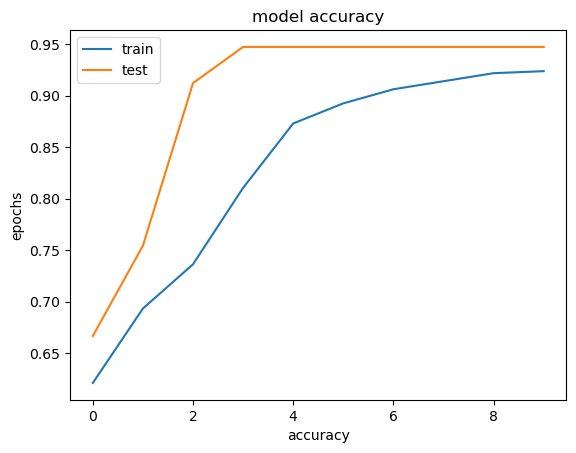

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model ac')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()